Decision Trees and Random Forests in Python

This is the code for the lecture video which goes over tree methods in Python. Reference the video lecture for the full explanation of the code!

I also wrote a blog post explaining the general logic of decision trees and random forests which you can check out. 

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

In [7]:
df = pd.read_csv("kyphosis.csv")

### EDA

In [9]:
df. head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


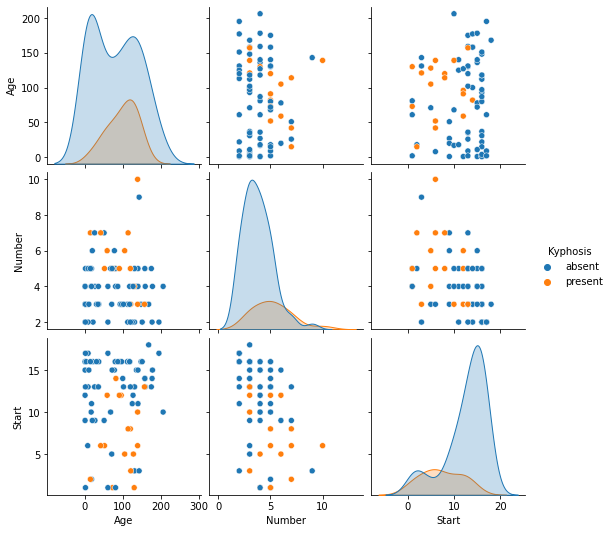

In [11]:
sns.pairplot(data=df,hue='Kyphosis')

### data split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Desision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [18]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
pred = dt.predict(X_test)

### Evaluate

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

      absent       0.74      0.70      0.72        20
     present       0.25      0.29      0.27         7

    accuracy                           0.59        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.61      0.59      0.60        27



### Random forest

In [23]:
from sklearn.ensemble import  RandomForestClassifier


In [29]:
rf = RandomForestClassifier(n_estimators=200)

In [30]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
rf_pred = rf.predict(X_test)

In [32]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

      absent       1.00      0.76      0.86        25
     present       0.25      1.00      0.40         2

    accuracy                           0.78        27
   macro avg       0.62      0.88      0.63        27
weighted avg       0.94      0.78      0.83        27



### Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:


In [48]:
!pip install graphviz

In [44]:
!pip install pydot-ng

In [49]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 



In [50]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

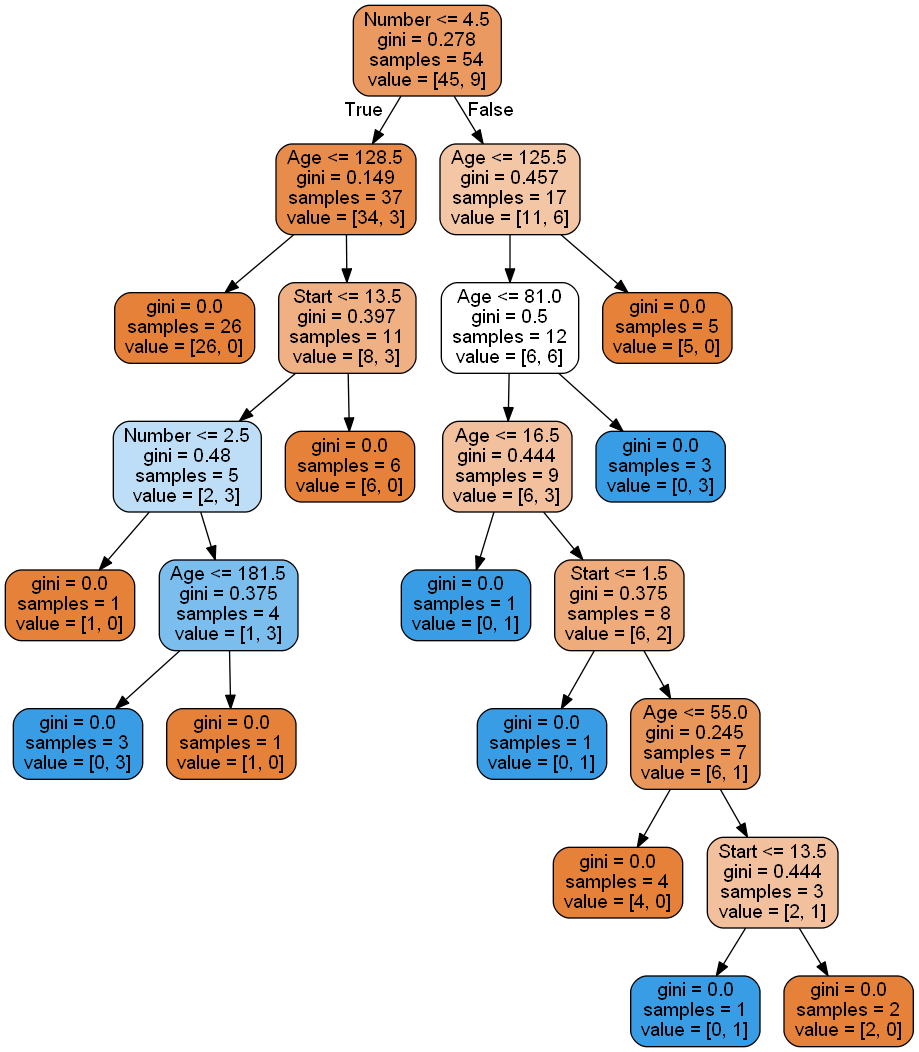

In [52]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 